In [101]:
import torch
import torchvision
import torchvision.transforms as transforms

In [102]:
transform = transforms.Compose([transforms.Pad(2),transforms.ToTensor()]) # Convert from PILImages to tensors
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

In [103]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

(4, 1, 32, 32)
tensor([8, 2, 2, 6])


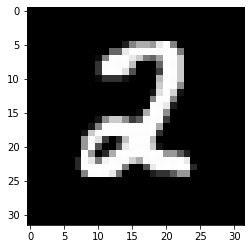

In [104]:
import matplotlib.pyplot as plt
import numpy as np

dataiter = iter(trainloader)
img, labels = dataiter.next()
npimg = img.numpy()
print(npimg.shape)
npimg[0].shape
plt.imshow(npimg[1][0], cmap='gray')
print(labels)

In [105]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution kernel
        # Note: Nice review on kernel sizing here: https://stats.stackexchange.com/questions/296679/what-does-kernel-size-mean/296701
        self.conv1 = nn.Conv2d(1,6,3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # Output * Conv2 input * Conv1 output
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # 10 output features representing the digit being 0...9
    
    def forward(self, x):
        # Max pooling over a (2,2) window
        # Note: https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:] # All features except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [113]:
net = Net()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

SyntaxError: invalid syntax (<ipython-input-113-98d9ac09d786>, line 6)

In [114]:
running_loss = 0
for epoch in range(2):
    for i, data in enumerate(trainloader, 0):
        imgs, labels = data
        targets = torch.zeros(len(labels), 10)
        for i, label in enumerate(labels):
            targets[i][label] = 1
        optimizer.zero_grad()
        outputs = net(imgs)
        loss = criterion(outputs,targets)
        loss.backward()
        optimizer.step()

print("finished training")

finished training


(4, 1, 32, 32)
tensor([3, 5, 7, 4])


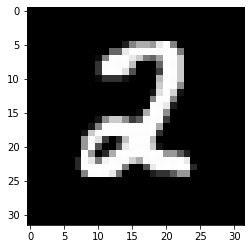

In [117]:
npimg = img.numpy()
print(npimg.shape)
npimg[0].shape
plt.imshow(npimg[1][0], cmap='gray')
print(labels)

In [118]:
net(img[1].unsqueeze(0))

tensor([[-0.0107,  0.0058,  1.2195, -0.0838,  0.0042, -0.0624, -0.0308, -0.0077,
         -0.0825,  0.0121]], grad_fn=<AddmmBackward>)

In [122]:
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True)

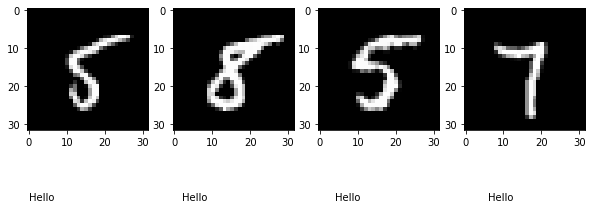

[tensor(5), tensor(8), tensor(5), tensor(7)]


In [163]:

testiter = iter(testloader)
imgs, lables = next(testiter)

fig = plt.figure(figsize=(10,10))
out = []
for i, img in enumerate(imgs):
    res = net(img.unsqueeze(0))
    out.append(torch.argmax(res))
    fig.add_subplot(1, 4, i+1)
    plt.text(i*2,50,"Hello")
    plt.imshow(img.numpy()[0], cmap='gray')
plt.show()
print(out)